In [1]:
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 4.9 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8047 sha256=efb2b8f328f7376aa347e60f3563cfddc4ef54b3653661526c4ec21c4486fc52
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [2]:
import os
import scanpy as sc
import pandas as pd
import h5py
import anndata as ad
from scipy.sparse import csr_matrix

DATA_DIR = "/kaggle/input/open-problems-multimodal/"
CITE_TRAIN_INPUTS = os.path.join(DATA_DIR,"train_cite_inputs.h5")
METADATA = os.path.join(DATA_DIR,"metadata.csv")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
metadata_df = pd.read_csv(METADATA)
cite_train_input_df = pd.read_hdf(CITE_TRAIN_INPUTS, key='train_cite_inputs')

In [6]:
cite_train_input_an = ad.AnnData(csr_matrix(cite_train_input_df))


In [8]:
cite_train_input_an.obs_names = cite_train_input_df.index.values
cite_train_input_an.var_names = cite_train_input_df.columns.values

In [10]:
cite_train_input_an.obs = cite_train_input_an.obs.join(metadata_df.set_index("cell_id"))

cite_train_input_an.obs.donor = cite_train_input_an.obs.donor.astype("category")
cite_train_input_an.obs.cell_type = cite_train_input_an.obs.cell_type.astype("category")
cite_train_input_an.obs.day = cite_train_input_an.obs.day.astype("category")
cite_train_input_an.obs.technology = cite_train_input_an.obs.technology.astype("category")

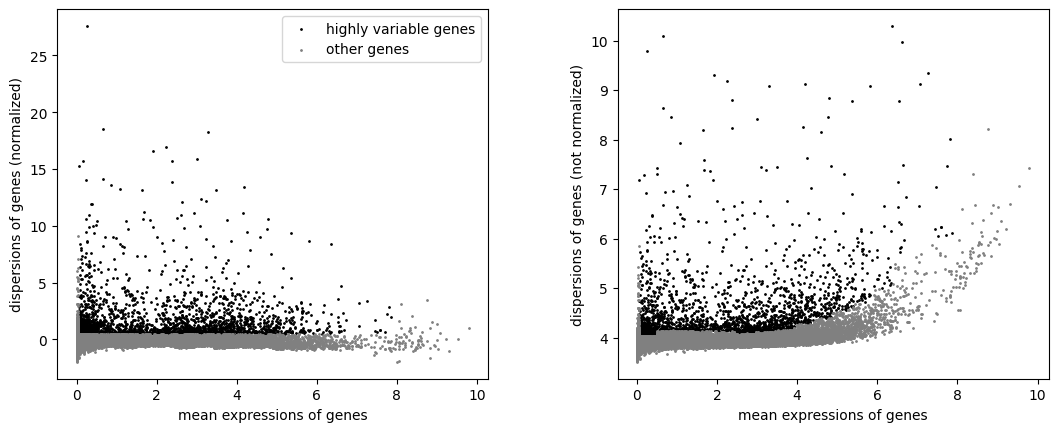

In [11]:
sc.pp.highly_variable_genes(cite_train_input_an, min_mean=0.05, max_mean=8, min_disp=0.5)
sc.pl.highly_variable_genes(cite_train_input_an)

In [30]:
sc.tl.pca(cite_train_input_an)

In [ ]:
sc.pp.neighbors(cite_train_input_an)
sc.tl.umap(cite_train_input_an, random_state=1)
sc.pl.umap(cite_train_input_an, color='cell_type')